In [ ]:
# brief data analysis and model creation

In [1]:
import xgboost as xgb
import pandas as pd
import sklearn
import matplotlib.pyplot as plt
import json
import os

In [2]:
pathDataset = "../../Env_3_7/data/dataset"
jsonTest = os.path.join(pathDataset, "mvp_etap4_all_3_test.json")
jsonOne = os.path.join(pathDataset, "mvp_etap4_one_3_train.json")
jsonAll = os.path.join(pathDataset, "mvp_etap4_all_3_train.json")

In [3]:
data = []
with open(jsonTest, 'r') as file:
    for line in file:
        data.append(json.loads(line))
print(len(data))

with open(jsonOne, 'r') as file:
    for line in file:
        data.append(json.loads(line))
print(len(data))

with open(jsonAll, 'r') as file:
    for line in file:
        data.append(json.loads(line))
print(len(data))

31
141
1568


In [4]:
df = pd.DataFrame.from_dict(data)

In [5]:
df.head()

,original_firstorder_10Percentile,original_firstorder_90Percentile,original_firstorder_Energy,original_firstorder_Entropy,original_firstorder_InterquartileRange,original_firstorder_Kurtosis,original_firstorder_Maximum,original_firstorder_MeanAbsoluteDeviation,original_firstorder_Mean,original_firstorder_Median,...,original_gldm_SmallDependenceHighGrayLevelEmphasis,original_gldm_SmallDependenceLowGrayLevelEmphasis,original_ngtdm_Busyness,original_ngtdm_Coarseness,original_ngtdm_Complexity,original_ngtdm_Contrast,original_ngtdm_Strength,Directory Name,File Name,Label
0,-113.0,101.0,161106121.0,2.970028,139.25,3.548962,193.0,74.175431,-44.108817,-89.0,...,56.017091,0.000278,0.909225,0.000908,230.560013,0.009937,1.323911,1.2.840.113619.2.428.3.285870791.690.154329709...,T8_anonymized.dcm,1
1,-113.0,57.0,150820830.0,3.213143,127.00,16.693847,196.0,65.976711,-43.080947,-73.0,...,138.324968,0.000213,0.345334,0.001068,559.342894,0.004976,4.241599,1.2.840.113619.2.428.3.285870791.801.158381879...,T1_anonymized.dcm,1
2,-107.0,127.0,135799244.0,3.408635,142.00,2.953939,281.0,77.857804,-13.886864,-39.0,...,92.686691,0.000282,0.576774,0.001272,270.768627,0.010548,1.374300,1.2.840.113619.2.428.3.285870791.801.158381879...,T2_anonymized.dcm,1
3,-125.0,72.1,452241944.0,3.646568,146.00,17.197746,245.0,91.927193,-56.646036,-64.0,...,252.850024,0.000407,0.295174,0.001020,943.940239,0.018160,4.235130,1.2.410.200010.48280462.58.1.3878872.362105 20...,T17_anonymized.dcm,1
4,-107.0,145.0,210348051.0,3.915805,167.00,7.289538,361.0,89.177087,10.607751,26.0,...,244.768244,0.000377,0.380478,0.001124,869.949111,0.013547,2.135571,1.2.410.200010.48280462.58.1.4835659.398126 20...,T15_anonymized.dcm,1


In [6]:
df.describe()

,original_firstorder_10Percentile,original_firstorder_90Percentile,original_firstorder_Energy,original_firstorder_Entropy,original_firstorder_InterquartileRange,original_firstorder_Kurtosis,original_firstorder_Maximum,original_firstorder_MeanAbsoluteDeviation,original_firstorder_Mean,original_firstorder_Median,...,original_gldm_LowGrayLevelEmphasis,original_gldm_SmallDependenceEmphasis,original_gldm_SmallDependenceHighGrayLevelEmphasis,original_gldm_SmallDependenceLowGrayLevelEmphasis,original_ngtdm_Busyness,original_ngtdm_Coarseness,original_ngtdm_Complexity,original_ngtdm_Contrast,original_ngtdm_Strength,Label
count,1568.000000,1568.000000,1.568000e+03,1568.000000,1568.000000,1568.000000,1568.000000,1568.000000,1568.000000,1568.000000,...,1568.000000,1568.000000,1568.000000,1568.000000,1568.000000,1568.000000,1568.000000,1568.000000,1568.000000,1568.000000
mean,-119.603571,118.491709,4.303988e+08,3.532908,126.639031,11.633852,689.913903,80.903457,7.878778,15.308992,...,0.018590,0.146485,119.630559,0.002380,1.758459,0.001184,830.737205,0.108318,4.041823,0.812500
std,154.177427,53.239486,3.904786e+09,0.342521,74.608206,8.964661,384.673567,44.446908,90.323856,116.914444,...,0.031146,0.045925,163.211371,0.002519,2.668472,0.000228,817.812246,3.664834,3.572098,0.390437
min,-3024.000000,-995.000000,6.281492e+07,1.242036,43.000000,1.441253,-974.000000,39.099543,-2353.773314,-3024.000000,...,0.000672,0.022740,1.899902,0.000119,0.053168,0.000262,28.186728,0.001956,0.051249,0.000000
25%,-109.000000,93.000000,1.236274e+08,3.313761,104.000000,3.897371,324.000000,63.725982,-9.063521,5.000000,...,0.001351,0.115183,13.642331,0.000265,0.239052,0.001005,284.116229,0.006453,1.178990,1.000000
50%,-97.550000,119.000000,1.674327e+08,3.510494,126.000000,9.097950,653.000000,72.894381,13.535917,30.000000,...,0.007122,0.135803,45.501747,0.001214,0.903915,0.001181,619.616629,0.009305,3.486054,1.000000
75%,-86.000000,145.000000,2.434406e+08,3.739176,148.000000,17.296635,1019.250000,84.576935,32.514157,48.000000,...,0.028844,0.159326,185.170666,0.003994,2.204442,0.001348,997.455453,0.017190,5.871367,1.000000
max,-9.000000,228.000000,1.089778e+11,4.494751,2021.000000,56.815113,1583.000000,908.786587,90.779645,79.000000,...,0.669103,0.297834,1723.010458,0.013796,32.698913,0.001866,3835.276061,145.123801,44.118840,1.000000


In [7]:
df.drop(['Directory Name', 'File Name'], axis=1, inplace=True)
# GLCM is symmetrical, therefore Sum Average = 2 * Joint Average, only 1 needs to be calculated
df.drop('original_glcm_SumAverage', axis=1, inplace=True)

label = df[['Label']].copy()

df.drop('Label', axis=1, inplace=True)

In [8]:
df.head()

,original_firstorder_10Percentile,original_firstorder_90Percentile,original_firstorder_Energy,original_firstorder_Entropy,original_firstorder_InterquartileRange,original_firstorder_Kurtosis,original_firstorder_Maximum,original_firstorder_MeanAbsoluteDeviation,original_firstorder_Mean,original_firstorder_Median,...,original_gldm_LargeDependenceLowGrayLevelEmphasis,original_gldm_LowGrayLevelEmphasis,original_gldm_SmallDependenceEmphasis,original_gldm_SmallDependenceHighGrayLevelEmphasis,original_gldm_SmallDependenceLowGrayLevelEmphasis,original_ngtdm_Busyness,original_ngtdm_Coarseness,original_ngtdm_Complexity,original_ngtdm_Contrast,original_ngtdm_Strength
0,-113.0,101.0,161106121.0,2.970028,139.25,3.548962,193.0,74.175431,-44.108817,-89.0,...,0.064897,0.001995,0.095827,56.017091,0.000278,0.909225,0.000908,230.560013,0.009937,1.323911
1,-113.0,57.0,150820830.0,3.213143,127.00,16.693847,196.0,65.976711,-43.080947,-73.0,...,0.023619,0.000956,0.108558,138.324968,0.000213,0.345334,0.001068,559.342894,0.004976,4.241599
2,-107.0,127.0,135799244.0,3.408635,142.00,2.953939,281.0,77.857804,-13.886864,-39.0,...,0.038415,0.001467,0.115112,92.686691,0.000282,0.576774,0.001272,270.768627,0.010548,1.374300
3,-125.0,72.1,452241944.0,3.646568,146.00,17.197746,245.0,91.927193,-56.646036,-64.0,...,0.030994,0.002003,0.172074,252.850024,0.000407,0.295174,0.001020,943.940239,0.018160,4.235130
4,-107.0,145.0,210348051.0,3.915805,167.00,7.289538,361.0,89.177087,10.607751,26.0,...,0.014146,0.001139,0.226904,244.768244,0.000377,0.380478,0.001124,869.949111,0.013547,2.135571


In [9]:
label.value_counts()

Label
1        1274
0         294
Name: count, dtype: int64

In [10]:
normalized_df=(df-df.mean())/df.std()
normalized_df.head()

,original_firstorder_10Percentile,original_firstorder_90Percentile,original_firstorder_Energy,original_firstorder_Entropy,original_firstorder_InterquartileRange,original_firstorder_Kurtosis,original_firstorder_Maximum,original_firstorder_MeanAbsoluteDeviation,original_firstorder_Mean,original_firstorder_Median,...,original_gldm_LargeDependenceLowGrayLevelEmphasis,original_gldm_LowGrayLevelEmphasis,original_gldm_SmallDependenceEmphasis,original_gldm_SmallDependenceHighGrayLevelEmphasis,original_gldm_SmallDependenceLowGrayLevelEmphasis,original_ngtdm_Busyness,original_ngtdm_Coarseness,original_ngtdm_Complexity,original_ngtdm_Contrast,original_ngtdm_Strength
0,0.042831,-0.328548,-0.068965,-1.643344,0.169029,-0.901862,-1.291781,-0.151372,-0.575569,-0.892182,...,-0.227913,-0.532803,-1.103055,-0.389761,-0.834431,-0.318248,-1.211338,-0.733881,-0.026845,-0.760873
1,0.042831,-1.155002,-0.071599,-0.933564,0.004838,0.564438,-1.283982,-0.335833,-0.564189,-0.755330,...,-0.248869,-0.566150,-0.825858,0.114541,-0.860429,-0.529564,-0.511841,-0.331854,-0.028198,0.055927
2,0.081747,0.159812,-0.075446,-0.362817,0.205888,-0.968237,-1.063015,-0.068523,-0.240973,-0.464519,...,-0.241357,-0.549748,-0.683143,-0.165086,-0.832904,-0.442832,0.385141,-0.684715,-0.026678,-0.746767
3,-0.035001,-0.871378,0.005594,0.331833,0.259502,0.620647,-1.156601,0.248020,-0.714372,-0.678351,...,-0.245125,-0.532536,0.557184,0.816239,-0.783212,-0.548361,-0.720633,0.138422,-0.024601,0.054116
4,0.081747,0.497907,-0.056354,1.117877,0.540972,-0.484604,-0.855047,0.186146,0.030213,0.091443,...,-0.253678,-0.560299,1.751075,0.766722,-0.795265,-0.516393,-0.262149,0.047947,-0.025860,-0.533651


In [11]:
def fit_classifier(alg, X_train, X_test, y_train, y_test):
    alg.fit(X_train, y_train)
    y_pred_train = alg.predict(X_train)
    y_pred_test = alg.predict(X_test)
    
    return {
        "ACC_train":  sklearn.metrics.accuracy_score(y_pred_train, y_train),
        "ACC_test": sklearn.metrics.accuracy_score(y_pred_test, y_test),
        "P_train":    sklearn.metrics.precision_score(y_pred_train, y_train, zero_division=0),
        "P_test":   sklearn.metrics.precision_score(y_pred_test, y_test, zero_division=0),
        "F1_train":   sklearn.metrics.f1_score(y_pred_train, y_train),
        "F1_test":  sklearn.metrics.f1_score(y_pred_test, y_test)
    }

In [12]:
def eval_function(alg, X_train, X_test, y_train, y_test):
    series = pd.concat([
        pd.Series(fit_classifier(alg, X_train, X_test, y_train, y_test))], axis=1).T
    return series

In [ ]:
kf = sklearn.model_selection.KFold(n_splits=5, shuffle=True)
n_folds = 5
model = xgb.XGBClassifier(n_estimators=2, max_depth=4)
    
results_cv = [eval_function(model,
                        normalized_df.iloc[train,:],
                        normalized_df.iloc[test,:],
                        label.iloc[train],
                        label.iloc[test]) for train, test in kf.split(normalized_df)]

results_metrics = sum(results_cv)/n_folds

In [14]:
print(results_metrics)

   ACC_train  ACC_test   P_train   P_test  F1_train   F1_test
0   0.888712  0.869921  0.997256  0.99127  0.935744  0.925117


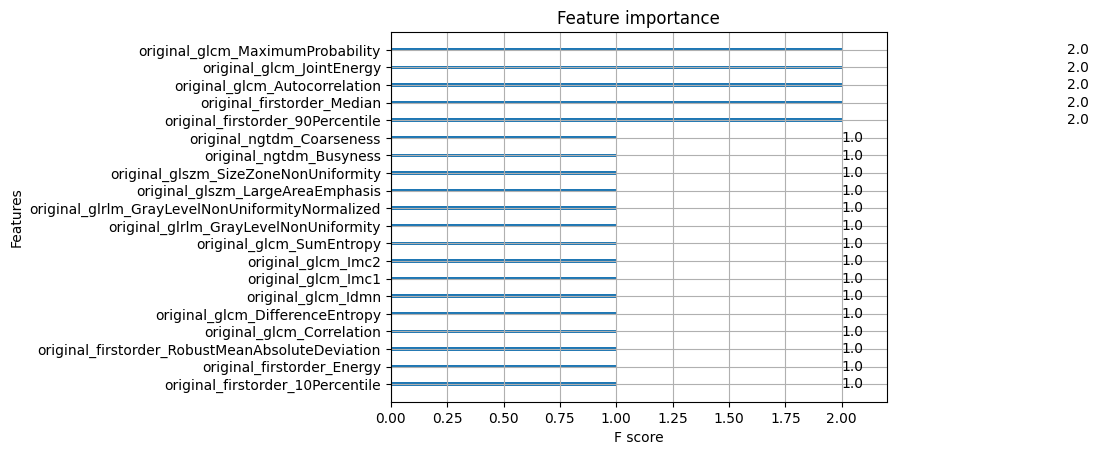

<Figure size 1600x1200 with 0 Axes>

In [21]:
xgb.plot_importance(model)
plt.figure(figsize = (16, 12))
plt.show()

In [31]:
jsonTestExtraSlices = os.path.join(pathDataset, "extra_slices_mvp_etap4_all_3_test.json")
jsonOneExtraSlices = os.path.join(pathDataset, "extra_slices_mvp_etap4_one_3_train.json")
jsonAllExtraSlices = os.path.join(pathDataset, "extra_slices_mvp_etap4_all_3_train.json")

In [32]:
extraSlicesData = []
with open(jsonTestExtraSlices, 'r') as file:
    for line in file:
        extraSlicesData.append(json.loads(line))
print(len(extraSlicesData))

with open(jsonOneExtraSlices, 'r') as file:
    for line in file:
        extraSlicesData.append(json.loads(line))
print(len(extraSlicesData))

with open(jsonAllExtraSlices, 'r') as file:
    for line in file:
        extraSlicesData.append(json.loads(line))
print(len(extraSlicesData))

135
331
2319


In [33]:
dfExtraSlices = pd.DataFrame.from_dict(extraSlicesData)

In [34]:
dfExtraSlices.drop(['Directory Name', 'File Name'], axis=1, inplace=True)
# GLCM is symmetrical, therefore Sum Average = 2 * Joint Average, only 1 needs to be calculated
dfExtraSlices.drop('original_glcm_SumAverage', axis=1, inplace=True)

labelExtraSlices = dfExtraSlices[['Label']].copy()

dfExtraSlices.drop('Label', axis=1, inplace=True)

In [35]:
labelExtraSlices.value_counts()

Label
1        1675
0         644
Name: count, dtype: int64

In [36]:
normalizedDfExtraSlices=(dfExtraSlices-dfExtraSlices.mean())/dfExtraSlices.std()
normalizedDfExtraSlices.head()

,original_firstorder_10Percentile,original_firstorder_90Percentile,original_firstorder_Energy,original_firstorder_Entropy,original_firstorder_InterquartileRange,original_firstorder_Kurtosis,original_firstorder_Maximum,original_firstorder_MeanAbsoluteDeviation,original_firstorder_Mean,original_firstorder_Median,...,original_gldm_LargeDependenceLowGrayLevelEmphasis,original_gldm_LowGrayLevelEmphasis,original_gldm_SmallDependenceEmphasis,original_gldm_SmallDependenceHighGrayLevelEmphasis,original_gldm_SmallDependenceLowGrayLevelEmphasis,original_ngtdm_Busyness,original_ngtdm_Coarseness,original_ngtdm_Complexity,original_ngtdm_Contrast,original_ngtdm_Strength
0,0.085152,-0.289151,-0.088716,-1.804986,0.071599,-0.893430,-1.286890,-0.212782,-0.331245,-0.530536,...,-0.157452,-0.398201,-1.286294,-0.378134,-0.861081,-0.353315,-0.989201,-0.772906,-0.037732,-0.701780
1,0.095168,-0.303835,-0.090098,-1.743552,0.060075,-0.935932,-1.217267,-0.223445,-0.314075,-0.524797,...,-0.158058,-0.398127,-1.390566,-0.386847,-0.886843,-0.346343,-1.061245,-0.772840,-0.037795,-0.717402
2,0.090160,-0.289151,-0.090475,-1.614405,0.050856,-0.960579,-1.144966,-0.229508,-0.309880,-0.519058,...,-0.152025,-0.383595,-1.282162,-0.430128,-0.837007,-0.294830,-0.973129,-0.786136,-0.037786,-0.775213
3,0.080145,-0.333201,-0.088114,-1.830982,0.060075,-0.769893,-1.348479,-0.223974,-0.347060,-0.542013,...,-0.166989,-0.418638,-1.232523,-0.203910,-0.896217,-0.464079,-1.102243,-0.671481,-0.038055,-0.456663
4,0.075137,-0.390466,-0.088067,-1.973215,0.032418,-0.788344,-1.353835,-0.255604,-0.367027,-0.547752,...,-0.163489,-0.410027,-1.318953,-0.299605,-0.894362,-0.409271,-1.140143,-0.735381,-0.037924,-0.593330


In [ ]:
kf = sklearn.model_selection.KFold(n_splits=5, shuffle=True)
n_folds = 5
model = xgb.XGBClassifier(n_estimators=2, max_depth=4)
    
results_cv = [eval_function(model,
                        normalizedDfExtraSlices.iloc[train,:],
                        normalizedDfExtraSlices.iloc[test,:],
                        labelExtraSlices.iloc[train],
                        labelExtraSlices.iloc[test]) for train, test in kf.split(normalizedDfExtraSlices)]

results_metrics = sum(results_cv)/n_folds

In [42]:
print(results_metrics)

   ACC_train  ACC_test   P_train    P_test  F1_train   F1_test
0   0.935963  0.921951  0.994476  0.989827  0.957327  0.948259


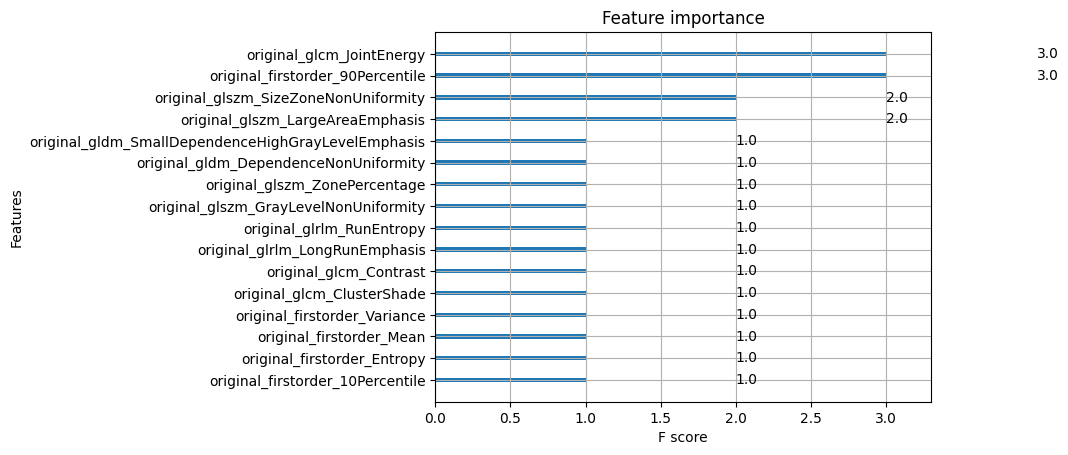

<Figure size 1600x1200 with 0 Axes>

In [43]:
xgb.plot_importance(model)
plt.figure(figsize = (16, 12))
plt.show()